In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head(5)

Order ID                   Product Quantity Ordered Price Each  \
135167   208062     AA Batteries (4-pack)                1       3.84   
33741    298859  Apple Airpods Headphones                1        150   
60259    155030    AAA Batteries (4-pack)                1       2.99   
178245   251108  Lightning Charging Cable                1      14.95   
166860   270882     AA Batteries (4-pack)                2       3.84   

            Order Date                      Purchase Address  
135167  05-07-19 14:09      233 Dogwood St, Dallas, TX 75001  
33741   12-09-19 10:58  124 11th St, San Francisco, CA 94016  
60259   02/24/19 19:21   194 6th St, New York City, NY 10001  
178245   09-05-19 8:29           36 4th St, Austin, TX 73301  
166860  10-09-19 22:50       3 Lincoln St, Seattle, WA 98101

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.shape

(186849, 6)

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(df[df['Price Each'] == 'Price Each'].index, inplace=True)

In [8]:
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186844   259353      AAA Batteries (4-pack)                3       2.99   
186845   259354                      iPhone                1        700   
186846   259355                      iPhone                1        700   
186847   259356      34in Ultrawide Monitor                1     379.99   
186848   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1       04-07-19 22:30        682 Chestnut St, Boston, MA 02215  
2       04-12-19 14:38     669 Spruce St, Los Angeles, CA 90001  
3       04-12-19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
186844  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186845  09-01-19 16:00  216 Dogwood St, San Francisco, CA 94016  
186846  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186847  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186848  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [9]:
df.isnull().mean()*100

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [10]:
df['Price Each'] = df['Price Each'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.9+ MB


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df['date'] = df['Order Date'].dt.date
df['time'] = df['Order Date'].dt.time

In [14]:
df.drop('Order Date', axis=1,inplace=True)

In [15]:
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time 

In [16]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')

In [17]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00  
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00  
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00  
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00  
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00  
...                                         ...        ...       ...  
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00  
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00  
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00  
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00  
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00  

[185950 rows x 7 columns]

In [18]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'date', 'time'],
      dtype='object')


In [19]:
df.columns = df.columns.str.strip()

In [20]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [21]:
df['Quantity Ordered'].fillna(0, inplace=True)


In [22]:
df['total_sale'] = df['Quantity Ordered'] * df['Price Each']

In [23]:
df['month']  = df['date'].dt.strftime('%B')
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month  
0            23.90      April  
1            99.99      April  
2           600.00      April  
3            11.99      April  
4            11.99      April  
...            ...        ...  
186844        8.97  September  
186845      700.00  September  
186846      700.00  September  
186847      379.99  September  
186848       11.95  September  

[185950 rows x 9 columns]

In [24]:
df['month_num'] = df['date'].dt.strftime('%m')


In [25]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  
0            23.90      April        04  
1            99.99      April        04  
2           600.00      April        04  
3            11.99      April        04  
4            11.99      April        04  
...            ...        ...       ...  
186844        8.97  September        09  
186845      700.00  September        09  
186846      700.00  September        09  
186847      379.99  September        09  
186848       11.95  September        09  

[185950 rows x 10 columns]

In [26]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   date              185950 non-null  datetime64[ns]
 6   time              185950 non-null  object        
 7   total_sale        185950 non-null  float64       
 8   month             185950 non-null  object        
 9   month_num         185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 14.9+ MB


In [28]:
print(df['time'].dtype)

object


In [29]:
df['time'] = df['time'].astype(str)

In [30]:
df['hour'] = df['time'].str.split(':').str[0].astype(int)
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  hour  
0            23.90      April        04     8  
1            99.99      April        04    22  
2           600.00      April        04    14  
3            11.99      April        04    14  
4            11.99      April        04     9  
...            ...        ...       ...   ...  
186844        8.97  September        09    20  
186845      700.00  September        09    16  
186846      700.00  September        09     7  
186847      379.99  September        09    17  
186848       11.95  September        09     0  

[185950 rows x 11 columns]

In [31]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


In [32]:
df['city'] = df['Purchase Address'].apply(lambda x:get_city(x))
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  hour            city  
0            23.90      April        04     8          Dallas  
1            99.99      April        04    22          Boston  
2           600.00      April        04    14     Los Angeles  
3            11.99      April        04    14     Los Angeles  
4            11.99      April        04     9     Los Angeles  
...            ...        ...       ...   ...             ...  
186844        8.97  September        09    20     Los Angeles  
186845      700.00  September        09    16   San Francisco  
186846      700.00  September        09     7   San Francisco  
186847      379.99  September        09    17   San Francisco  
186848       11.95  September        09     0   San Francisco  

[185950 rows x 12 columns]

In [33]:
df['state'] = df['Purchase Address'].apply(lambda x:get_state(x))
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  hour            city state  
0            23.90      April        04     8          Dallas    TX  
1            99.99      April        04    22          Boston    MA  
2           600.00      April        04    14     Los Angeles    CA  
3            11.99      April        04    14     Los Angeles    CA  
4            11.99      April        04     9     Los Angeles    CA  
...            ...        ...       ...   ...             ...   ...  
186844        8.97  September        09    20     Los Angeles    CA  
186845      700.00  September        09    16   San Francisco    CA  
186846      700.00  September        09     7   San Francisco    CA  
186847      379.99  September        09    17   San Francisco    CA  
186848       11.95  September        09     0   San Francisco    CA  

[185950 rows x 13 columns]

In [34]:
states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}


In [35]:
df['state_name'] = df['state'].apply(lambda x:states.get(x))
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  hour            city state  \
0            23.90      April        04     8          Dallas    TX   
1            99.99      April        04    22          Boston    MA   
2           600.00      April        04    14     Los Angeles    CA   
3            11.99      April        04    14     Los Angeles    CA   
4            11.99      April        04     9     Los Angeles    CA   
...            ...        ...       ...   ...             ...   ...   
186844        8.97  September        09    20     Los Angeles    CA   
186845      700.00  September        09    16   San Francisco    CA   
186846      700.00  September        09     7   San Francisco    CA   
186847      379.99  September        09    17   San Francisco    CA   
186848       11.95  September        09     0   San Francisco    CA   

           state_name  
0               Texas  
1       Massachusetts  
2          California  
3          California  
4          California  
...               ...  
186844     California  
186845     California  
186846     California  
186847     California  
186848     California  

[185950 rows x 14 columns]

# Exploratory Data Analysis

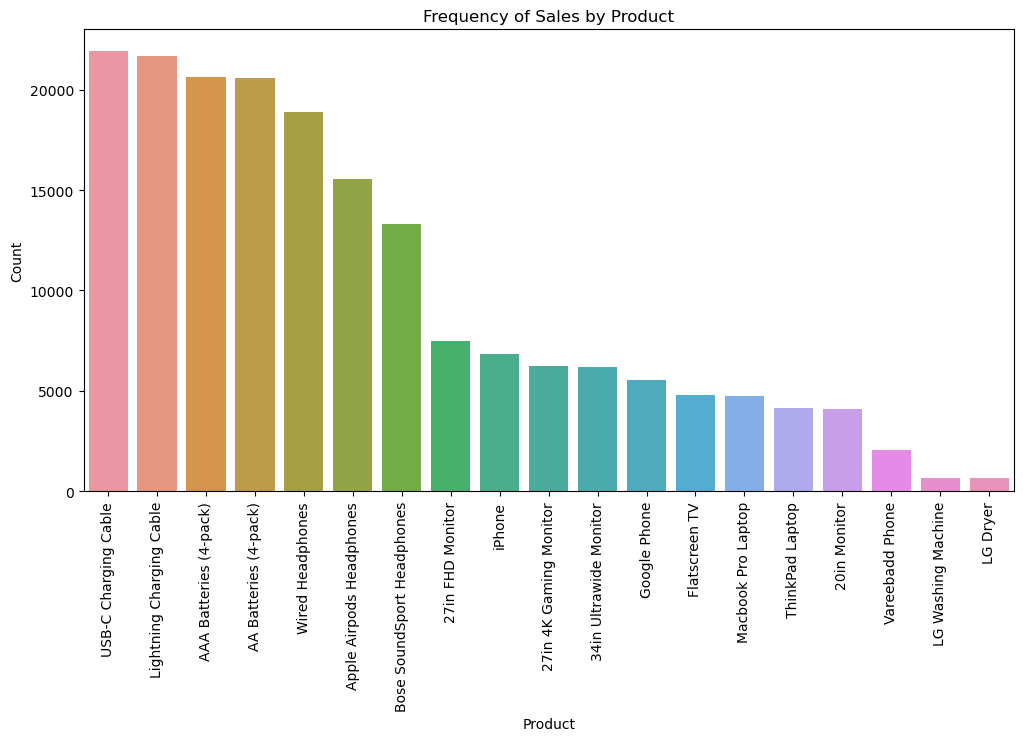

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.title("Frequency of Sales by Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

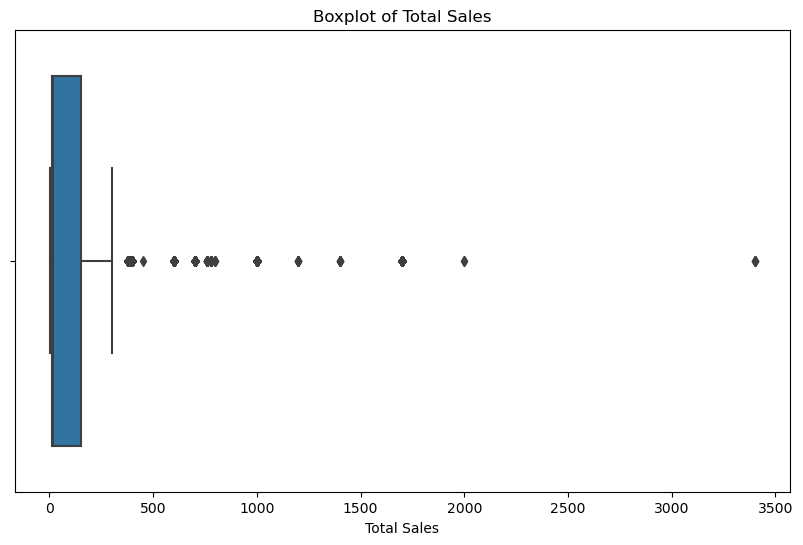

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='total_sale')
plt.title("Boxplot of Total Sales")
plt.xlabel("Total Sales")
plt.show()


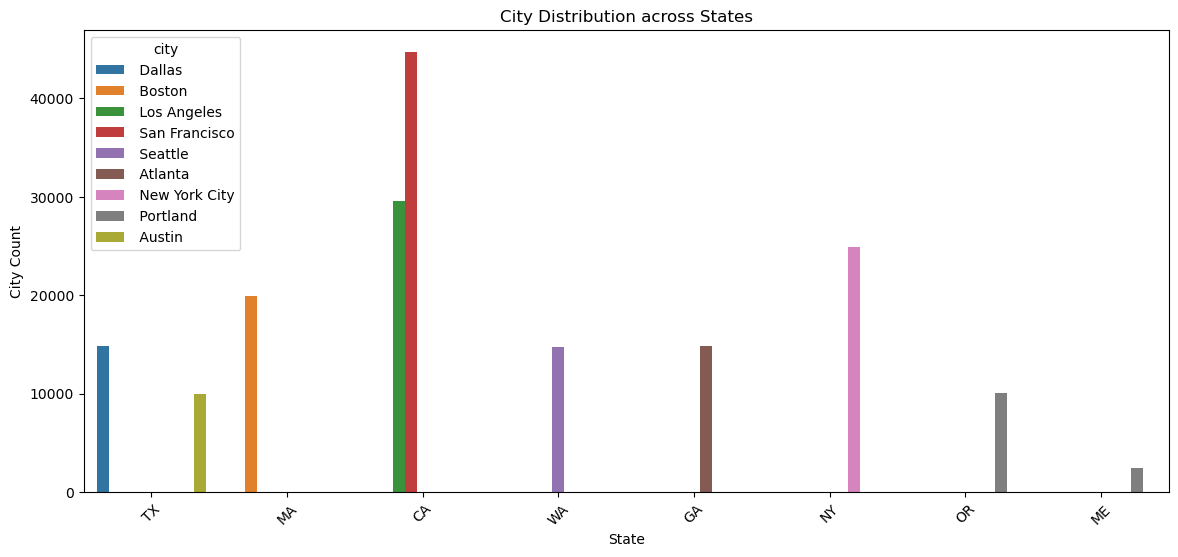

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='state', hue='city')
plt.title("City Distribution across States")
plt.xlabel("State")
plt.ylabel("City Count")
plt.xticks(rotation=45)
plt.show()

# Finding the best month dot sales and how much was earned


In [39]:
results = df.groupby('month_num').sum()
results.sort_values('total_sale',ascending=False)

Quantity Ordered  Price Each  total_sale    hour
month_num                                                  
12                    28114  4588415.41  4613443.34  359978
10                    22703  3715554.83  3736726.88  290650
04                    20558  3367671.02  3390670.24  262259
11                    19798  3180600.68  3199603.20  254865
05                    18667  3135125.13  3152606.75  238780
03                    17005  2791207.83  2807100.38  218969
07                    16072  2632539.56  2647775.76  206169
06                    15253  2562025.61  2577802.26  195528
08                    13448  2230345.42  2244467.88  172289
02                    13449  2188884.72  2202022.42  172669
09                    13109  2084992.09  2097560.13  168513
01                    10903  1811768.38  1822256.73  139485

<AxesSubplot:xlabel='month_num', ylabel='total_sale'>

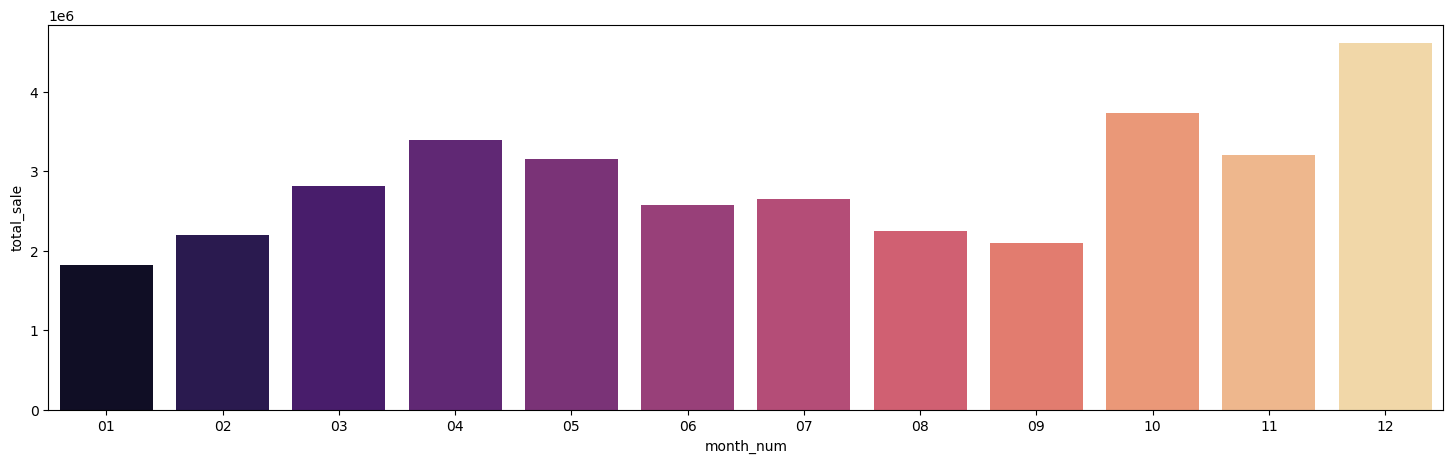

In [40]:
plt.figure(figsize=(18,5))
sns.barplot(x = results.index, y = results['total_sale'],palette='magma')


# What Product does sell the most

In [41]:
product_sale = df.groupby('Product').sum()
product_sale.sort_values('total_sale',ascending=True)

Quantity Ordered  Price Each  total_sale    hour
Product                                                                     
AAA Batteries (4-pack)                 31017    61716.59    92740.83  297332
AA Batteries (4-pack)                  27635    79015.68   106118.40  298342
Wired Headphones                       20557   226395.18   246478.43  271720
USB-C Charging Cable                   23975   261740.85   286501.25  314645
Lightning Charging Cable               23217   323787.10   347094.15  312529
LG Dryer                                 646   387600.00   387600.00    9326
LG Washing Machine                       666   399600.00   399600.00    9785
20in Monitor                            4129   451068.99   454148.71   58764
Vareebadd Phone                         2068   826000.00   827200.00   29472
27in FHD Monitor                        7550  1125974.93  1132424.50  107540
Bose SoundSport Headphones             13457  1332366.75  1345565.43  192445
Flatscreen TV                           4819  1440000.00  1445700.00   68815
Apple Airpods Headphones               15661  2332350.00  2349150.00  223304
34in Ultrawide Monitor                  6199  2348718.19  2355558.01   89076
27in 4K Gaming Monitor                  6244  2429637.70  2435097.56   90916
Google Phone                            5532  3315000.00  3319200.00   79479
ThinkPad Laptop                         4130  4127958.72  4129958.70   59746
iPhone                                  6849  4789400.00  4794300.00   98657
Macbook Pro Laptop                      4728  8030800.00  8037600.00   68261

<AxesSubplot:title={'center':'Quantity of Product sold'}, xlabel='Product', ylabel='Quantity Ordered'>

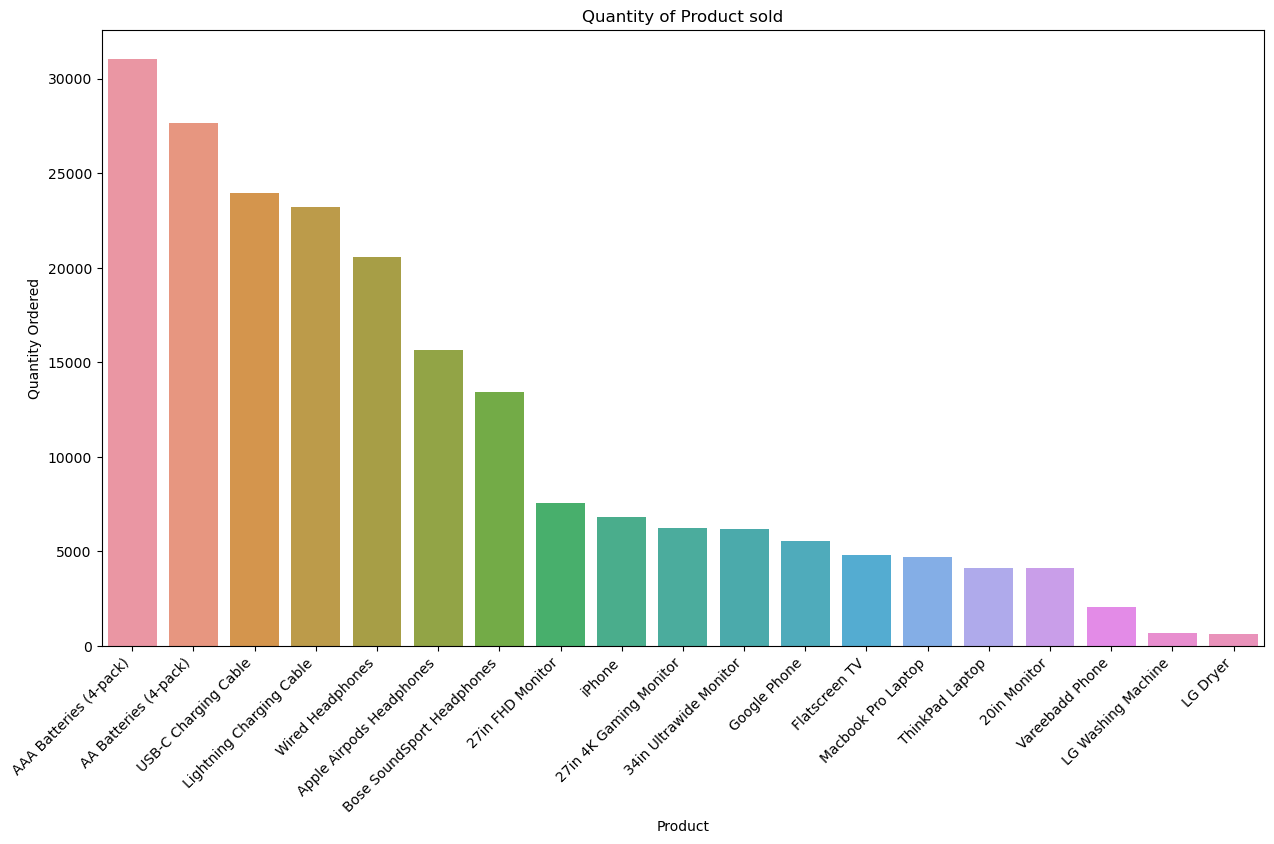

In [42]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Names')
plt.ylabel('Quantity Sold')
plt.title('Quantity of Product sold')
sorted_sale = product_sale.sort_values(by='Quantity Ordered',ascending=False)
sns.barplot(x=sorted_sale.index,y=sorted_sale['Quantity Ordered'])

# Cites with the highest sales  

In [43]:
city_results = df.groupby('city').sum()
city_results.sort_values('total_sale', ascending = False)


Quantity Ordered  Price Each  total_sale    hour
city                                                            
 San Francisco             50239  8211461.74  8262203.91  643265
 Los Angeles               33289  5421435.23  5452570.80  427444
 New York City             27932  4635370.83  4664317.43  357696
 Boston                    22528  3637409.77  3661642.01  288225
 Atlanta                   16602  2779908.20  2795498.58  214264
 Dallas                    16730  2752627.82  2767975.40  214390
 Seattle                   16553  2733296.01  2747755.48  213292
 Portland                  14053  2307747.47  2320490.61  179632
 Austin                    11153  1809873.61  1819581.75  141946

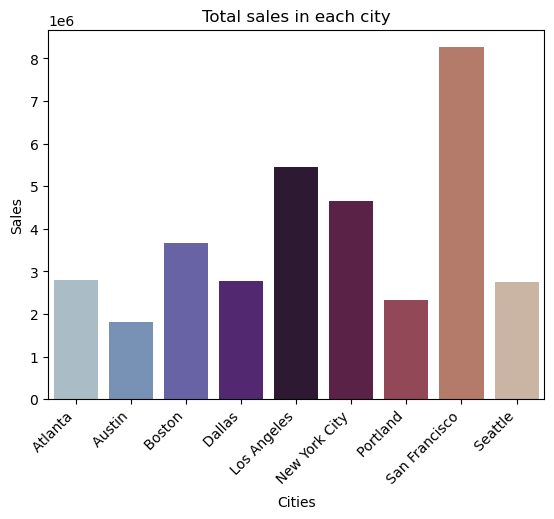

<Figure size 1500x800 with 0 Axes>

In [44]:
plt.title("Total sales in each city")
sns.barplot(x=city_results.index,y=city_results['total_sale'],palette='twilight')
plt.xlabel("Cities")
plt.xticks(rotation='45',ha='right')
plt.ylabel("Sales")
plt.figure(figsize=(15,8))
plt.show()

# highest sales state wise

In [45]:
state_results = df.groupby('state_name').sum()
state_results.sort_values('total_sale', ascending = False)


Quantity Ordered   Price Each   total_sale     hour
state_name                                                        
California                83528  13632896.97  13714774.71  1070709
New York                  27932   4635370.83   4664317.43   357696
Texas                     27883   4562501.43   4587557.15   356336
Massachusetts             22528   3637409.77   3661642.01   288225
Georgia                   16602   2779908.20   2795498.58   214264
Washington                16553   2733296.01   2747755.48   213292
Oregon                    11303   1860558.22   1870732.34   144421
Maine                      2750    447189.25    449758.27    35211

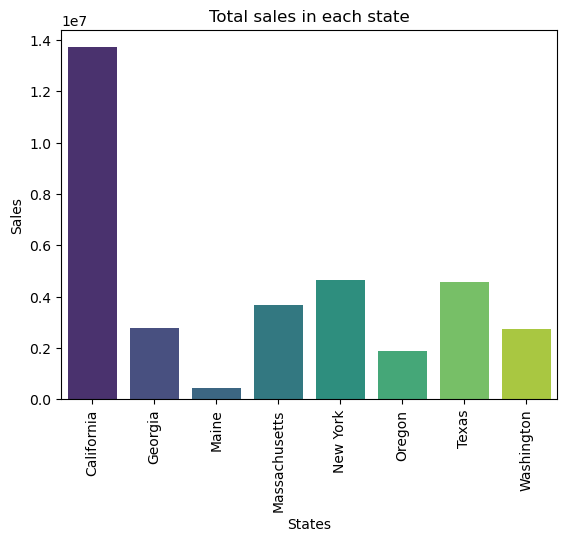

<Figure size 1500x800 with 0 Axes>

In [46]:
plt.title("Total sales in each state")
sns.barplot(x=state_results.index,y=state_results['total_sale'],palette='viridis')
plt.xlabel("States")
plt.xticks(rotation='90')
plt.ylabel("Sales")
plt.figure(figsize=(15,8))
plt.show()

In [47]:
df['minutes'] = df['time'].str.split(':').str[1].astype(int)


# best time for advertisment 

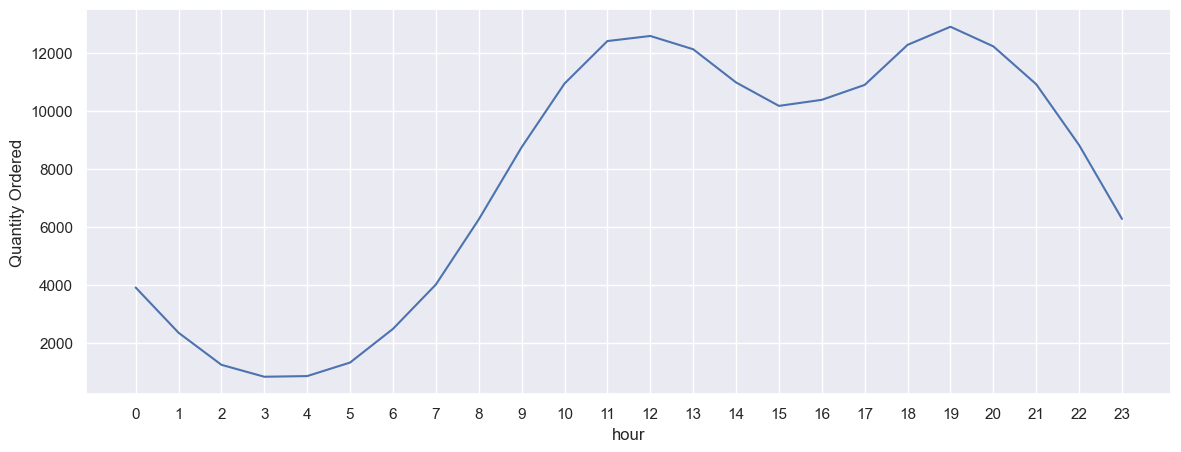

In [48]:
time_group = df.groupby('hour').count()
plt.figure(figsize = (14, 5))
sns.set(style = 'darkgrid')
sns.lineplot(x = time_group.index, y = time_group['Quantity Ordered'])
plt.xticks(time_group.index)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   date              185950 non-null  datetime64[ns]
 6   time              185950 non-null  object        
 7   total_sale        185950 non-null  float64       
 8   month             185950 non-null  object        
 9   month_num         185950 non-null  object        
 10  hour              185950 non-null  int32         
 11  city              185950 non-null  object        
 12  state             185950 non-null  object        
 13  state_name        185950 non-null  object        
 14  minu

# Most quantity bought

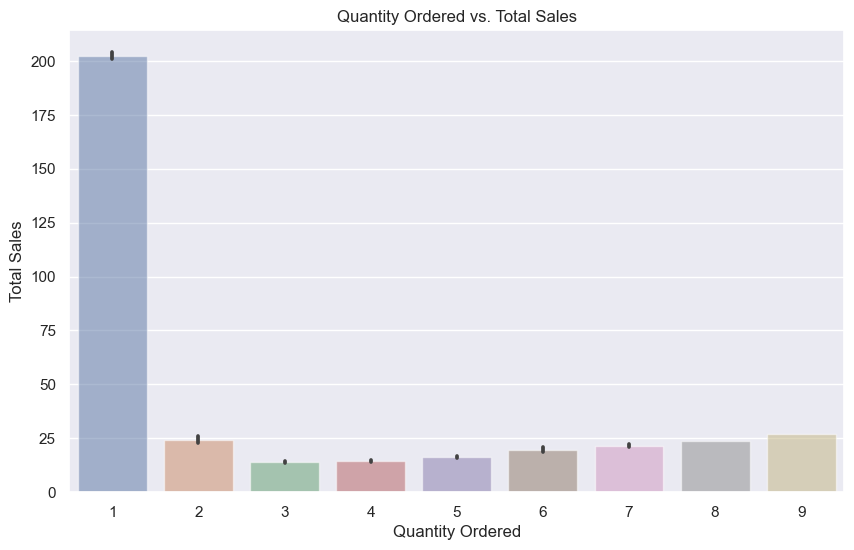

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Quantity Ordered', y='total_sale', alpha=0.5)
plt.title("Quantity Ordered vs. Total Sales")
plt.xlabel("Quantity Ordered")
plt.ylabel("Total Sales")
plt.show()

In [51]:
df.shape

(185950, 15)

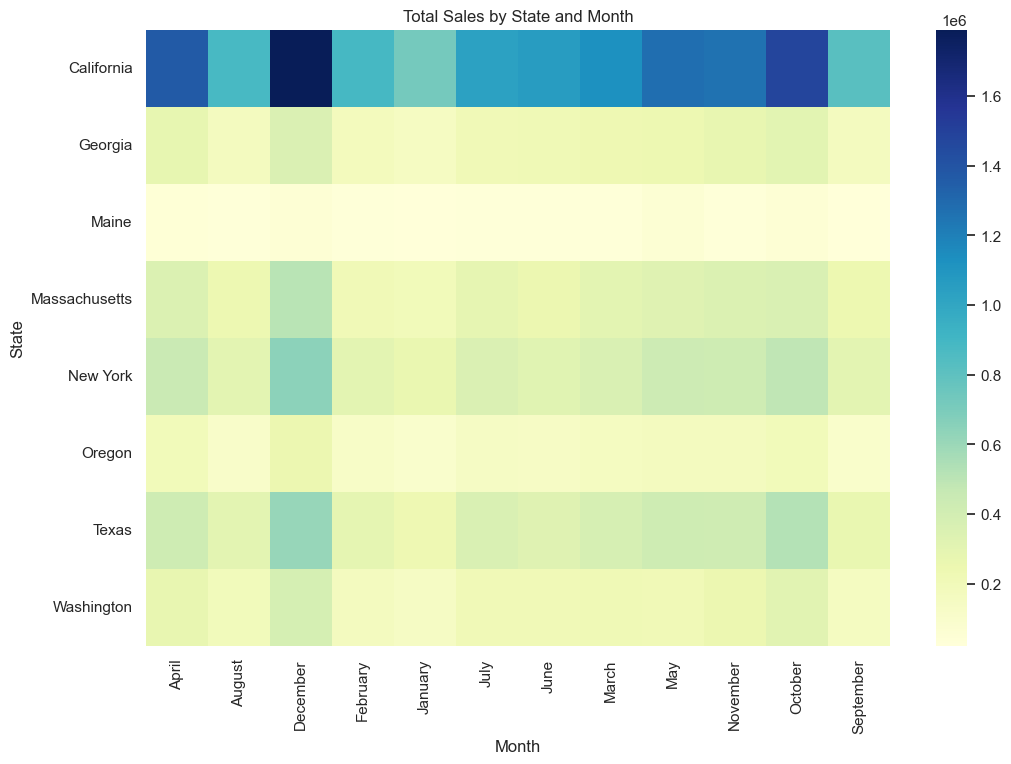

In [52]:
pivot = df.pivot_table(index='state_name', columns='month', values='total_sale', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, fmt=".1f", cmap="YlGnBu")
plt.title("Total Sales by State and Month")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()

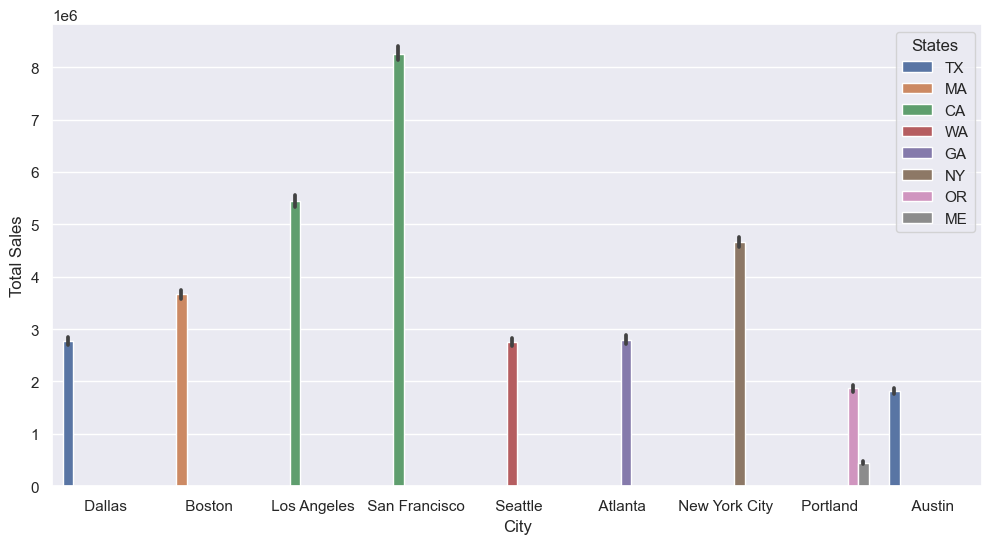

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='city',y='total_sale',estimator=sum,hue='state')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.legend(title='States')
plt.show()

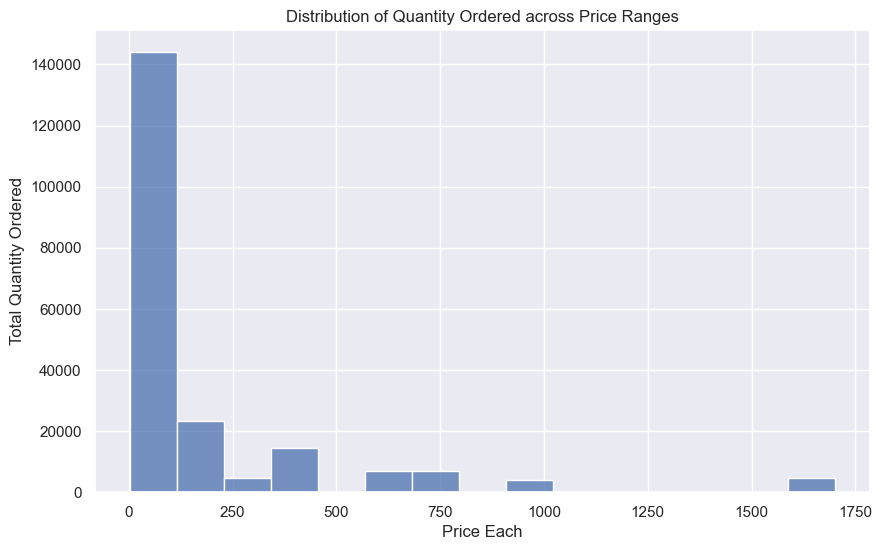

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price Each', bins=15, weights='Quantity Ordered', kde=False)
plt.title("Distribution of Quantity Ordered across Price Ranges")
plt.xlabel("Price Each")
plt.ylabel("Total Quantity Ordered")
plt.show()

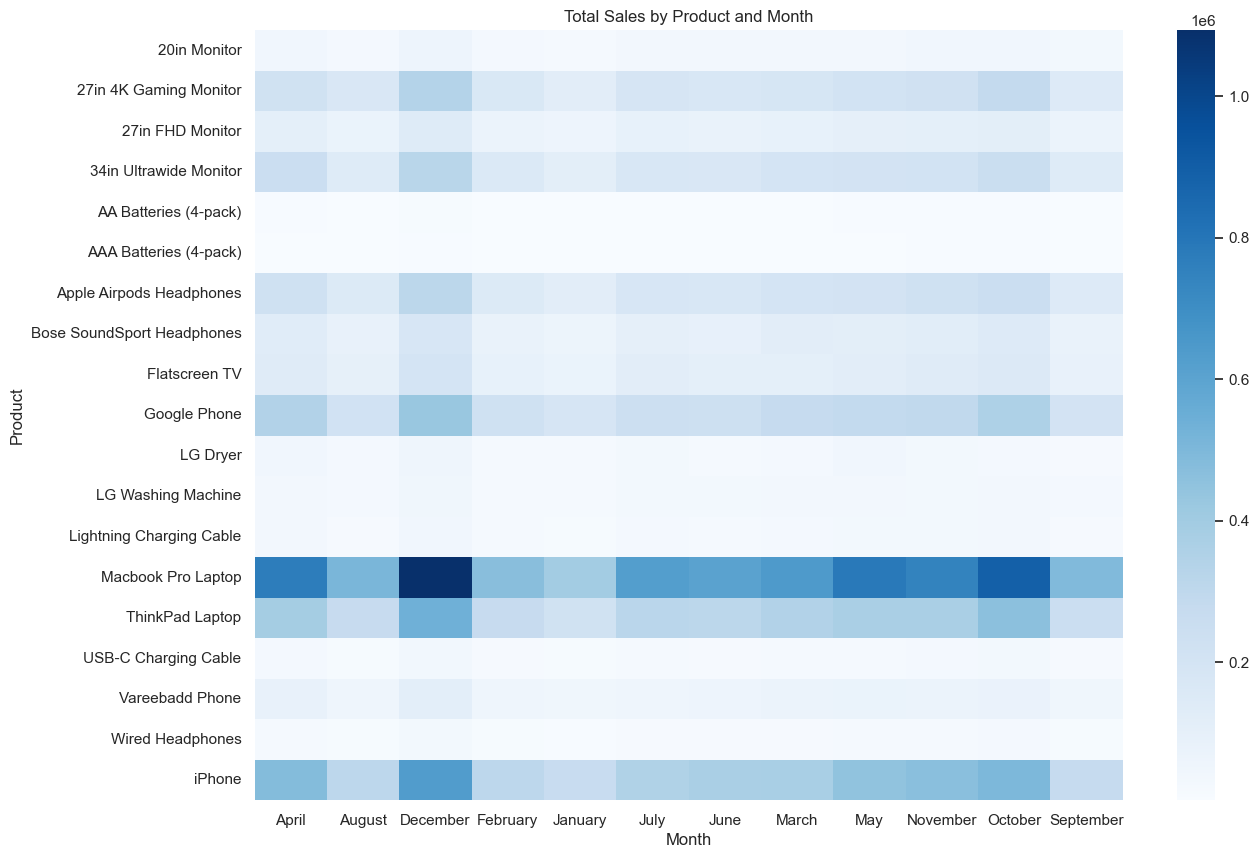

In [55]:
product_month_sales = df.pivot_table(index='Product', columns='month', values='total_sale', aggfunc='sum')
plt.figure(figsize=(14, 10))
sns.heatmap(product_month_sales, fmt=".1f", cmap="Blues")
plt.title("Total Sales by Product and Month")
plt.xlabel("Month")
plt.ylabel("Product")
plt.show()

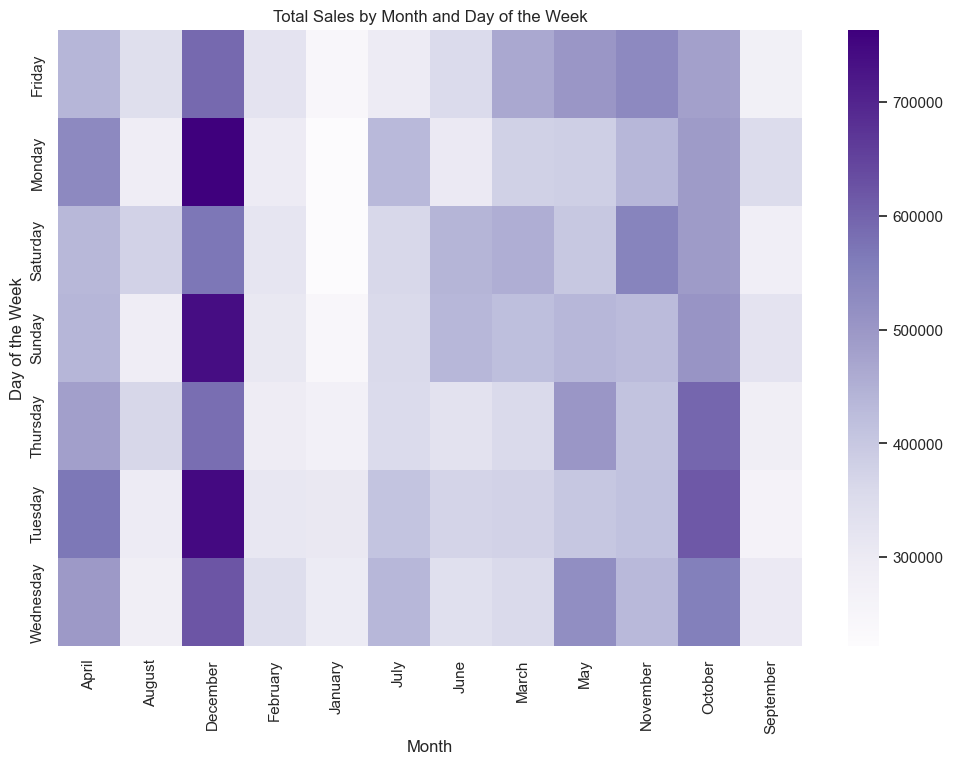

In [56]:
df['day_of_week'] = df['date'].dt.day_name()

sales_by_month_day = df.pivot_table(index='day_of_week', columns='month', values='total_sale', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_month_day, fmt=".1f", cmap="Purples")
plt.title("Total Sales by Month and Day of the Week")
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.show()

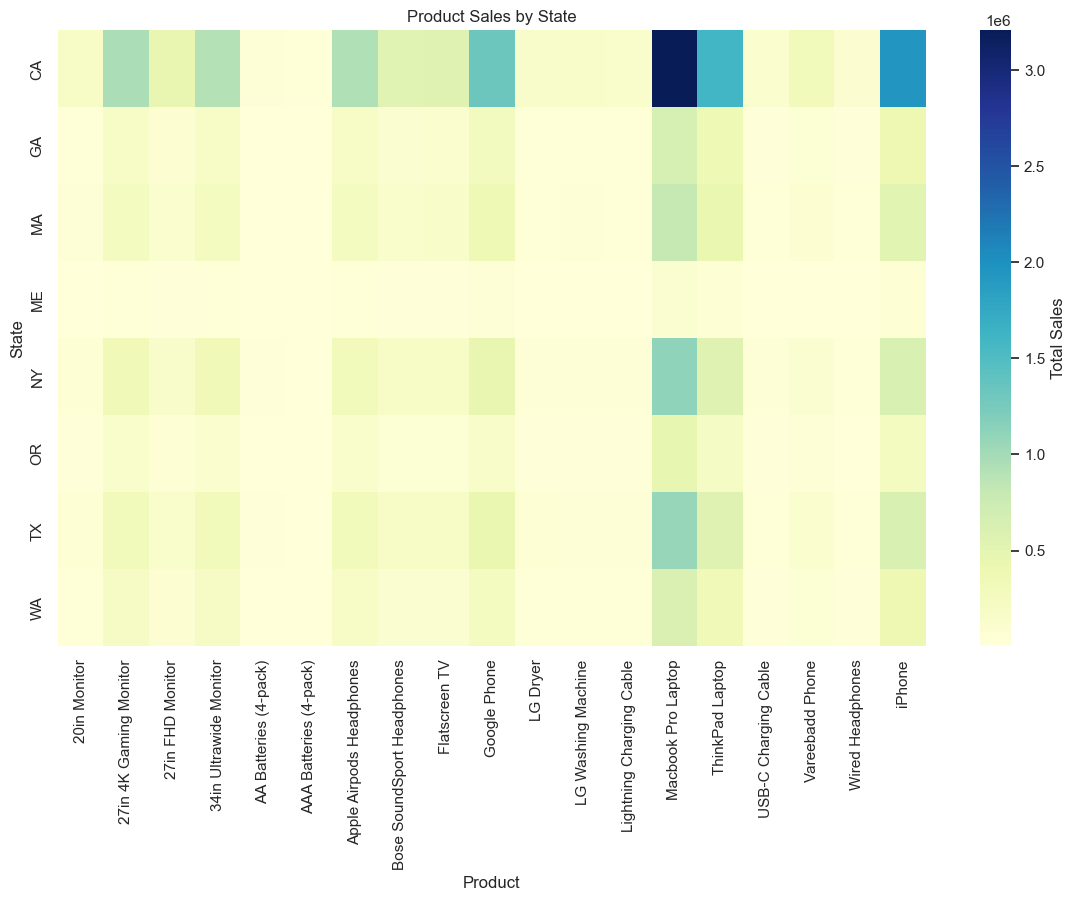

In [57]:
pivot_table_sales = df.pivot_table(values='total_sale', 
                                   index='state', 
                                   columns='Product', 
                                   aggfunc='sum', 
                                   fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_sales, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Total Sales'})
plt.title('Product Sales by State')
plt.xlabel('Product')
plt.ylabel('State')
plt.xticks(rotation=90)
plt.show()

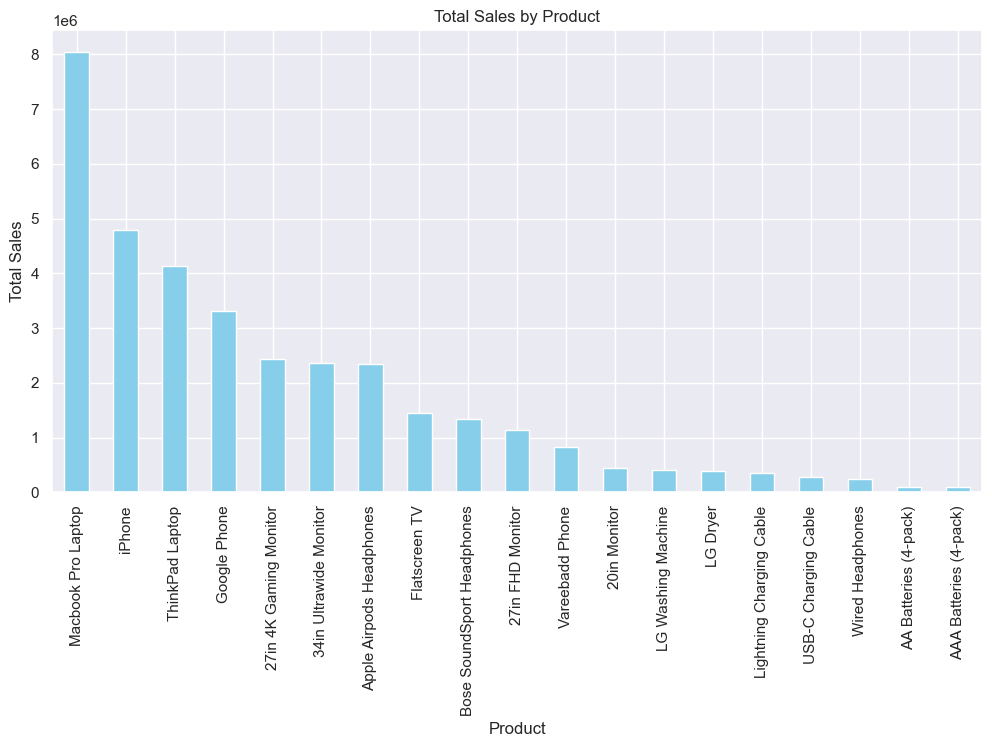

In [58]:
product_sales = df.groupby('Product')['total_sale'].sum().sort_values(ascending=False)

# Plotting a bar chart to visualize the product sales
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [59]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

                               Purchase Address       date      time  \
0                  917 1st St, Dallas, TX 75001 2019-04-19  08:46:00   
1             682 Chestnut St, Boston, MA 02215 2019-04-07  22:30:00   
2          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
3          669 Spruce St, Los Angeles, CA 90001 2019-04-12  14:38:00   
4             333 8th St, Los Angeles, CA 90001 2019-04-30  09:27:00   
...                                         ...        ...       ...   
186844   840 Highland St, Los Angeles, CA 90001 2019-09-17  20:56:00   
186845  216 Dogwood St, San Francisco, CA 94016 2019-09-01  16:00:00   
186846     220 12th St, San Francisco, CA 94016 2019-09-23  07:39:00   
186847   511 Forest St, San Francisco, CA 94016 2019-09-19  17:30:00   
186848   250 Meadow St, San Francisco, CA 94016 2019-09-30  00:18:00   

        total_sale      month month_num  hour            city state  \
0            23.90      April        04     8          Dallas    TX   
1            99.99      April        04    22          Boston    MA   
2           600.00      April        04    14     Los Angeles    CA   
3            11.99      April        04    14     Los Angeles    CA   
4            11.99      April        04     9     Los Angeles    CA   
...            ...        ...       ...   ...             ...   ...   
186844        8.97  September        09    20     Los Angeles    CA   
186845      700.00  September        09    16   San Francisco    CA   
186846      700.00  September        09     7   San Francisco    CA   
186847      379.99  September        09    17   San Francisco    CA   
186848       11.95  September        09     0   San Francisco    CA   

           state_name  minutes day_of_week  
0               Texas       46      Friday  
1       Massachusetts       30      Sunday  
2          California       38      Friday  
3          California       38      Friday  
4          California       27     Tuesday  
...               ...      ...         ...  
186844     California       56     Tuesday  
186845     California        0      Sunday  
186846     California       39      Monday  
186847     California       30    Thursday  
186848     California       18      Monday  

[185950 rows x 16 columns]

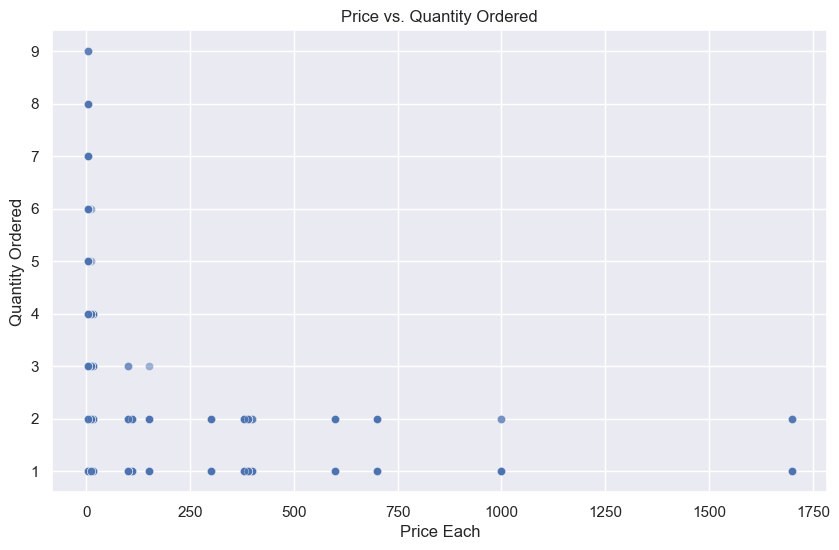

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df, alpha=0.5)
plt.title("Price vs. Quantity Ordered")
plt.xlabel("Price Each")
plt.ylabel("Quantity Ordered")
plt.show()

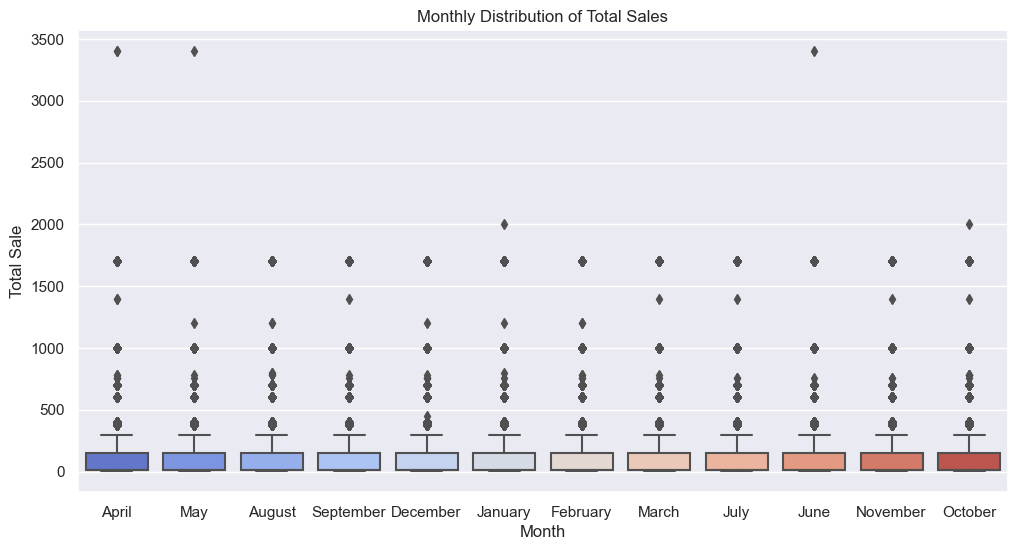

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='total_sale', data=df, palette="coolwarm")
plt.title("Monthly Distribution of Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sale")
plt.show()

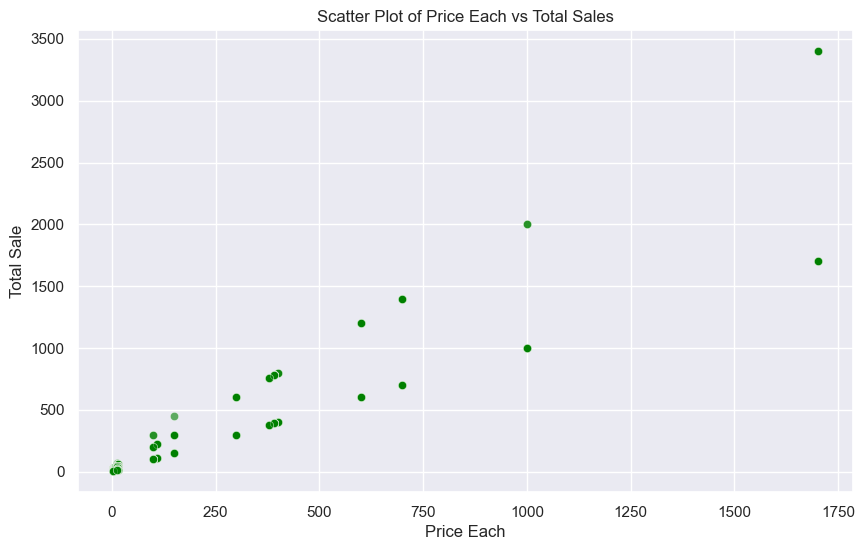

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='total_sale', data=df, alpha=0.6, color='green')
plt.title("Scatter Plot of Price Each vs Total Sales")
plt.xlabel("Price Each")
plt.ylabel("Total Sale")
plt.show()



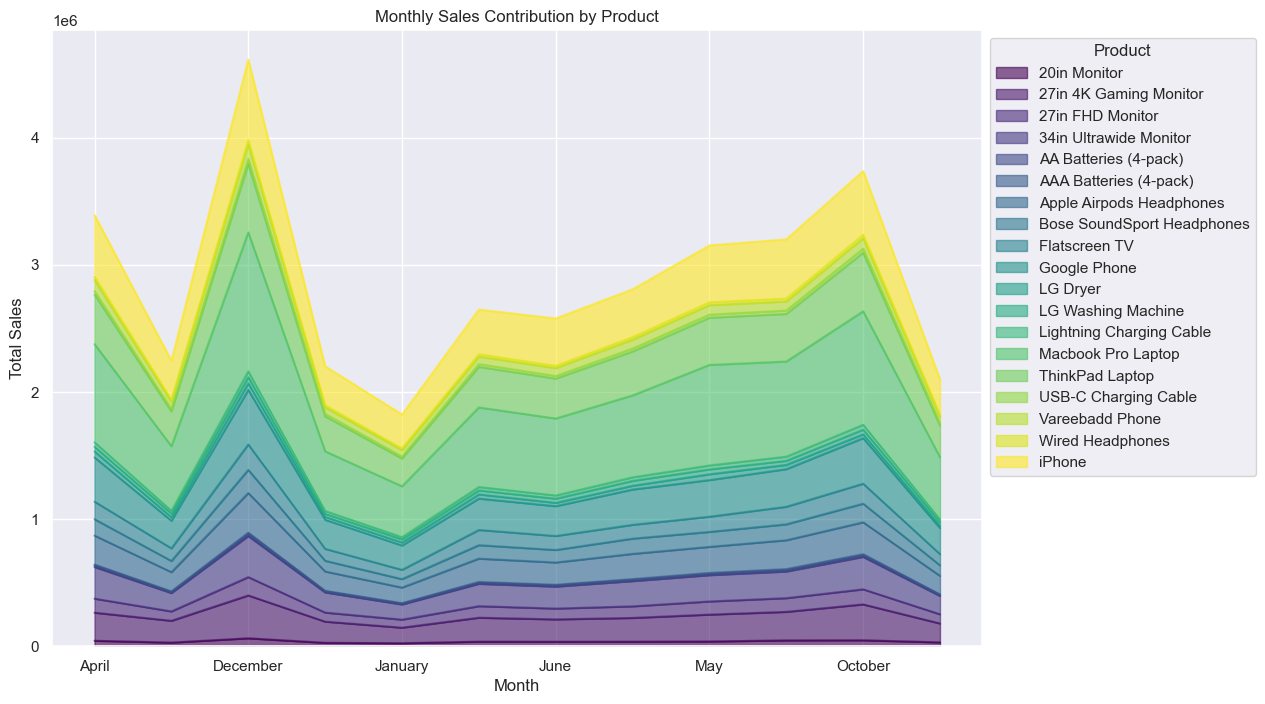

In [63]:
monthly_sales = df.groupby(['month', 'Product'])['total_sale'].sum().unstack().fillna(0)

# Plotting the stacked area chart
monthly_sales.plot(kind='area', stacked=True, figsize=(12, 8), colormap="viridis", alpha=0.6)
plt.title("Monthly Sales Contribution by Product")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Product", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [64]:
import plotly.express as px

# Aggregating data for the sunburst chart
sunburst_data = df.groupby(['state', 'city', 'Product'])['total_sale'].sum().reset_index()

# Creating the sunburst chart
fig = px.sunburst(sunburst_data, path=['state', 'city', 'Product'], values='total_sale',
                  color='total_sale', color_continuous_scale='RdYlBu', title="Sales Breakdown by State, City, and Product")
fig.show()

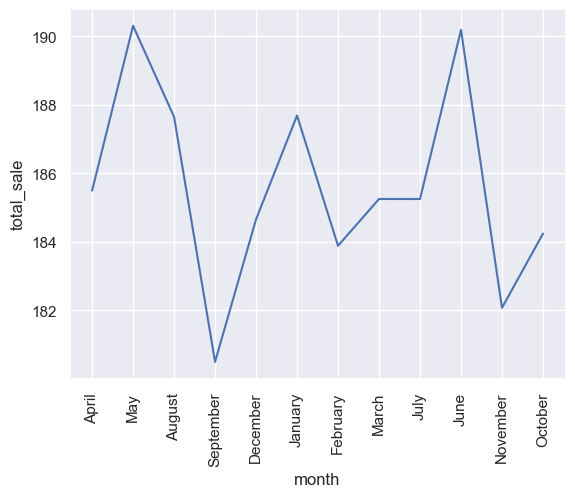

In [70]:
sns.lineplot(data=df,x='month',y='total_sale',ci=None)
plt.xticks(rotation=90)
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Purchase Address  185950 non-null  object        
 5   date              185950 non-null  datetime64[ns]
 6   time              185950 non-null  object        
 7   total_sale        185950 non-null  float64       
 8   month             185950 non-null  object        
 9   month_num         185950 non-null  object        
 10  hour              185950 non-null  int32         
 11  city              185950 non-null  object        
 12  state             185950 non-null  object        
 13  state_name        185950 non-null  object        
 14  minu